# Run Node.js in Jupyter Notebook

## Associated video

In [9]:
$$.html("<iframe width='560' height='315' src='https://www.youtube.com/embed/la928ga1AbQ?si=avSaCW79coAvVBU8' \
        frameborder='0' allow='accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share' \
        allowfullscreen></iframe>");

## Prerequisites

### Install Anaconda and Jupyter Notebook

The [Jupyter Notebook](https://en.wikipedia.org/wiki/Project_Jupyter) tool enables in-browser code editing and execution, presenting computational outcomes. It implements the concept of computation notebooks. These interactive computational platforms, primarily developed for data science applications, merge code, computational output, explanatory text, and multimedia into one cohesive document.

Let's install it on Windows! Jupyter Notebook relies on Python, necessitating a Python distribution for Windows. Let's install [Anaconda](https://www.anaconda.com/) — a comprehensive Python distribution tailored for big data, AI, and machine learning.

Post installation, the Anaconda Navigator presents a user-friendly interface. Here’s how to set up Jupyter, Node.js, and IJavascript using a Windows command prompt within an activated Anaconda environment:

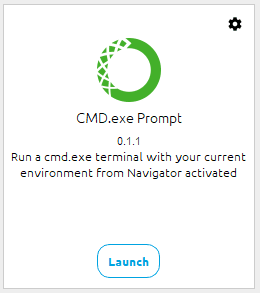


```shell
conda install -c conda-forge jupyter
```

After a restart, Jupyter Notebook becomes accessible via the Anaconda Navigator.

### Install a Javascript kernel

Jupyter comes with a Python kernel by default, so let's install the [IJavascript](https://github.com/n-riesco/ijavascript) kernel to access to the Node.js standard library as well as any installed npm modules.

Again, from the *CMD.exe Prompt*:

```shell
conda install nodejs
npm install -g ijavascript
ijsinstall
```

Note that Jupyter supports many more [kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) including C, C++, C#, Go, Java, Rust, SQL...

Because you could run code in a Notebook in any order you want and multiple times, **do not use `let` or `const` in your code**.

### Customize the environment

Unlike the Python kernel, IJavascript doesn't implement magic commands allowing to easy run shell code directly from Jupyter. The [magicpatch](https://www.npmjs.com/package/magicpatch) proposes to solve this issue but I could'nt make it work on my installation (this is a [known issue](https://github.com/apowers313/magicpatch/issues/102)). 

For now let's create a `sh` helper function to execute shell commands, according to [this example](https://dev.to/obenjiro/silence-of-the-fans-part-1-javascript-quickstart-5f3m).

In [10]:
var { spawn } = require('child_process');
var sh = (cmd) => {
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};

We can now install the [esm-hook](https://www.npmjs.com/package/esm-hook) Node.js package to allow the use ESM modules with zero setup. We use the brand new `sh` function.

In [11]:
sh('npm install esm-hook');
require("esm-hook");


up to date, audited 268 packages in 3s


28 packages are looking for funding
  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



## API call

Let's finish with a simple call to the Completion API of OpenAI.

We use the [dotenv](https://www.npmjs.com/package/dotenv) Node.js package to store our API key in a local .env file.


In [12]:
// Get API key from local .env file
sh('npm install dotenv');
var dotenv = require("dotenv");
dotenv.config();


changed 1 package, and audited 268 packages in 1s


28 packages are looking for funding

  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



In [13]:
//Install and import OpenAI Node.js library
sh('npm install openai');


up to date, audited 268 packages in 1s


28 packages are looking for funding
  run `npm fund` for details


5 vulnerabilities (1 low, 4 moderate)

To address issues that do not require attention, run:
  npm audit fix

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



In [14]:
var { Configuration, OpenAIApi } = require("openai");

var configuration = new Configuration({
  apiKey: process.env.GPT_KEY,
});
var openai = new OpenAIApi(configuration);

async function runCompletion() {
    var completion = await openai.createChatCompletion({
        model: "gpt-4",
        messages: [{ role: 'user', content: 'Why is the sky blue?' }],
    });
    console.log(completion.data.choices[0].message.content);
}

runCompletion();

Promise { <pending> }

The sky appears blue because of a process called Rayleigh scattering. As sunlight reaches Earth's atmosphere, it is scattered in every direction by the gas molecules in the air. Blue light is scattered more because it travels in smaller, shorter waves. This scattering of blue light is what makes the sky look blue in our perception.
